## 데이터 시각화

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import numpy as np
import pandas as pd
import joblib

### 작업 경로 확인 및 변경

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python1Basic/code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['APT_List_Seoul_2021.csv',
 'Naver_APT_Detail_Seoul.xlsx',
 'Naver_APT_Detail_Seoul.csv',
 'APT_Price_Seoul_2021.csv',
 'APT_List_Seoul_2021.xlsx',
 'KBO_Hitters_2021.xlsx',
 'KBO_Hitters_2021.csv',
 'APT_Price_Seoul_2021.xlsx',
 'APT_List_Seoul_2021.z',
 'APT_Mean_Price_Dong_2021.xlsx']

### 실습 데이터셋 준비: z 파일

In [5]:
# z 파일을 호출하고 데이터프레임 apt에 할당합니다.
apt = joblib.load(filename = 'APT_List_Seoul_2021.z')

In [6]:
# apt의 정보를 확인합니다.
apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41264 entries, 0 to 41263
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   아파트     41264 non-null  object        
 1   시도      41264 non-null  object        
 2   자치구     41264 non-null  object        
 3   읍면동     41264 non-null  object        
 4   지번      41264 non-null  object        
 5   거래일     41264 non-null  datetime64[ns]
 6   전용면적    41264 non-null  float64       
 7   층       41264 non-null  int64         
 8   거래금액    41264 non-null  float64       
 9   평당금액    41264 non-null  float64       
 10  금액구분    41264 non-null  object        
 11  주소      41264 non-null  object        
 12  아파트ID   41264 non-null  int64         
 13  아파트명    41264 non-null  object        
 14  위도      41264 non-null  float64       
 15  경도      41264 non-null  float64       
 16  세대수     41264 non-null  int64         
 17  임대수     41264 non-null  int64         
 18  동수    

In [7]:
# apt의 처음 5행을 출력합니다.
apt.head()

,아파트,시도,자치구,읍면동,지번,거래일,전용면적,층,거래금액,평당금액,...,아파트명,위도,경도,세대수,임대수,동수,주차대수,용적률,건폐율,건설사
0,동아그린,서울특별시,용산구,이촌동,411,2021-01-01,43.02,11,8.75,6711.99,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
1,동아그린,서울특별시,용산구,이촌동,411,2021-01-05,59.58,15,11.80,6535.75,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
2,동아그린,서울특별시,용산구,이촌동,411,2021-01-19,84.82,18,13.00,5057.77,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
3,동아그린,서울특별시,용산구,이촌동,411,2021-01-19,114.96,19,14.95,4291.49,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
4,동아그린,서울특별시,용산구,이촌동,411,2021-01-23,43.02,3,8.15,6251.74,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)


In [8]:
# apt에 거래월을 추가합니다.
apt['거래월'] = apt['거래일'].dt.month

### 시각화 설정: 라이브러리 호출

In [9]:
# 관련 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

/Users/hdsceokevin/Venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hdsceokevin/Venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hdsceokevin/Venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hdsceokevin/Venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


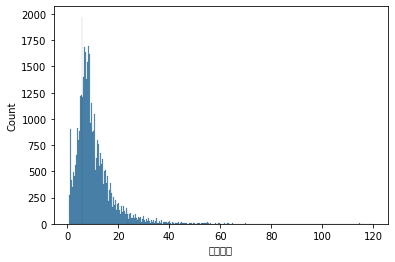

In [10]:
# 테스트용 그래프를 그립니다.
sns.histplot(data = apt, x = '거래금액');

### 시각화 설정: 스타일시트

In [11]:
# matplotlib 라이브러리에서 사용할 수 있는 스타일시트 목록을 확인합니다.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [12]:
# 그래프에 적용할 스타일시트를 지정합니다.
plt.style.use(style = 'seaborn-white')

### 시각화 설정: 한글폰트

In [13]:
# 현재 사용 중인 컴퓨터에 설치된 전체 폰트 파일명을 리스트로 반환합니다.
fontList = fm.findSystemFonts(fontext = 'ttf')

In [14]:
# 특정 문자열을 갖는 파일명을 남깁니다.
fontPath = [font for font in fontList if 'Gamja' in font]

In [15]:
# fontPath를 오름차순 정렬합니다.
fontPath.sort()

In [16]:
# 반복문으로 폰트명을 출력합니다.
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())

Gamja Flower


### 시각화 설정: 그래픽 파라미터

In [17]:
# 그래프 크기와 해상도를 설정합니다.
plt.rc(group = 'figure', figsize = (8, 4), dpi = 100)

In [18]:
# 한글폰트와 글자 크기를 설정합니다.
plt.rc(group = 'font', family = 'Gamja Flower', size = 10)

In [19]:
# 유니코드 마이너스를 축에 출력하지 않도록 설정합니다.
plt.rc(group = 'axes', unicode_minus = False)

In [20]:
# 범례에 채우기 색과 테두리 색을 추가합니다.
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

### [참고] 한글을 네모로 출력하는 문제 해결 방법

### [참고] 그래픽 파라미터 설정 관련 모듈 생성

### [참고] Python 파일 탐색 경로 확인

### 히스토그램 그리기

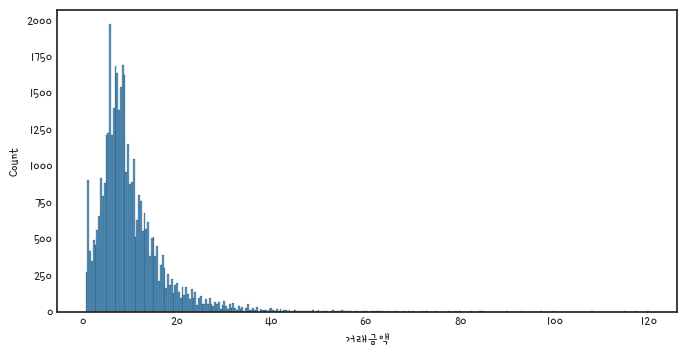

In [21]:
# 거래금액으로 히스토그램을 그립니다.
sns.histplot(data = apt, x = '거래금액');

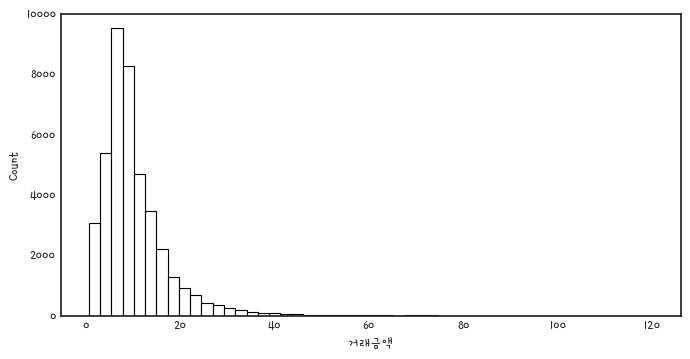

In [22]:
# 히스토그램의 막대 개수를 50으로 지정합니다.
sns.histplot(data = apt, x = '거래금액', bins = 50, 
             color = '1', edgecolor = '0');

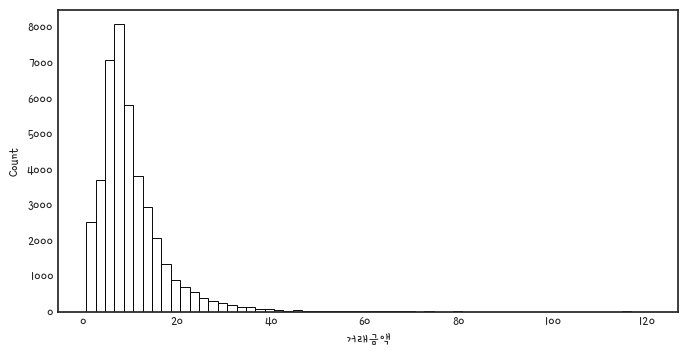

In [23]:
# 히스토그램의 막대 너비를 2로 지정합니다.
sns.histplot(data = apt, x = '거래금액', binwidth = 2, 
             color = '1', edgecolor = '0');

### [참고] 색상 목록

In [24]:
# 관련 라이브러리를 호출합니다.
import matplotlib.colors as mcolors

In [25]:
# 148가지 색이름과 Hex Code를 딕셔너리로 출력합니다.
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

### 히스토그램 계급 설정

In [26]:
# 거래금액 최솟값과 최댓값을 확인합니다.
apt['거래금액'].describe()[['min', 'max']]

min      0.66
max    120.00
Name: 거래금액, dtype: float64

In [27]:
# 히스토그램 계급(막대 경계)을 설정합니다.
bins = np.arange(start = 0, stop = 121, step = 2)
bins

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120])

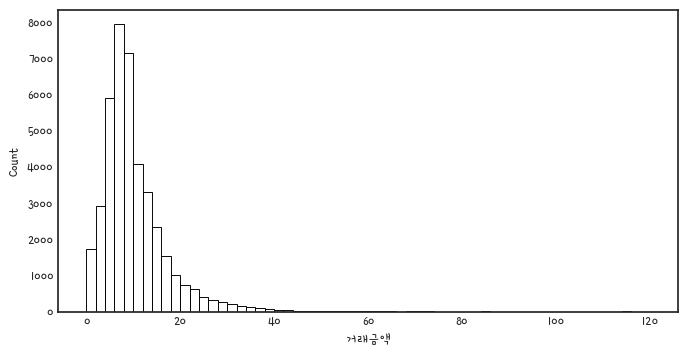

In [28]:
# 히스토그램에 계급을 추가합니다.
sns.histplot(data = apt, x = '거래금액', bins = bins, 
             color = '1', edgecolor = '0');

### 히스토그램 막대 채우기 색 변경

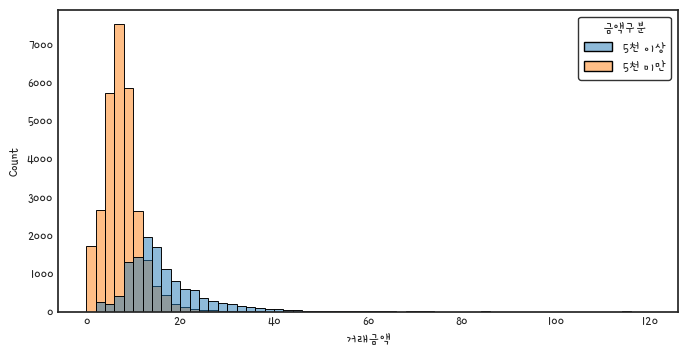

In [29]:
# 금액구분(범주형 변수)에 따라 채우기 색을 다르게 설정합니다.
sns.histplot(data = apt, x = '거래금액', bins = bins, 
             hue = '금액구분', edgecolor = '0');

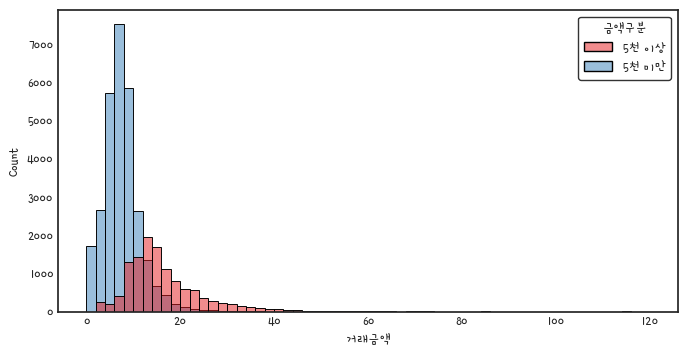

In [30]:
# 채우기 색 배합을 범주형 변수에 적합한 팔레트로 변경합니다.
sns.histplot(data = apt, x = '거래금액', bins = bins, 
             hue = '금액구분', edgecolor = '0', palette = 'Set1');

### [참고] 팔레트 탐색: Color Brewer

### [참고] 팔레트 설정

In [31]:
# 기본 팔레트 색을 출력합니다.
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [32]:
# Color Brewer에서 탐색한 팔레트 색을 출력합니다.
sns.color_palette(palette = 'Set1', n_colors = 9)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [33]:
# 기본 팔레트를 변경합니다.
sns.set_palette(palette = 'Set1', n_colors = 9)

In [34]:
# 새로 설정한 기본 팔레트 색을 확인합니다.
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

### [참고] 사용자 팔레트 생성

In [35]:
# 색이름을 원소로 갖는 리스트(사용자 팔레트)를 생성합니다.
myPal = ['crimson', 'royalblue']

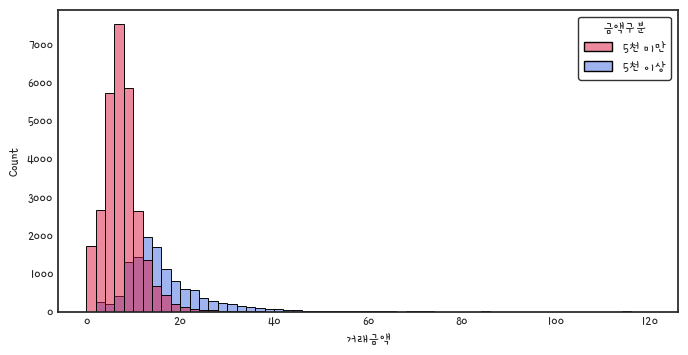

In [36]:
# 기존 그래프에 사용자 팔레트를 적용합니다.
sns.histplot(data = apt, x = '거래금액', bins = bins, 
             hue = '금액구분', edgecolor = '0', palette = myPal, 
             hue_order = ['5천 미만', '5천 이상']);

### 히스토그램에 제목 및 축이름 추가

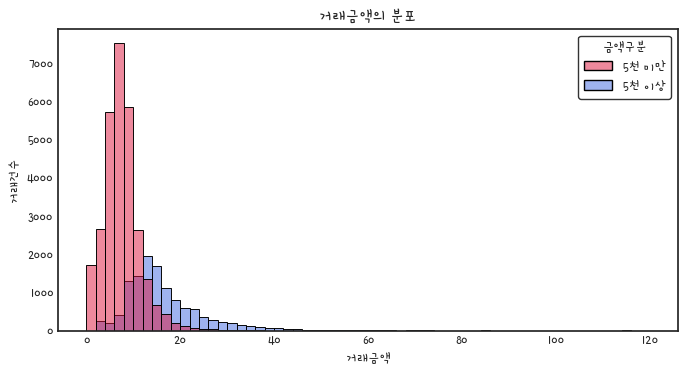

In [37]:
# 히스토그램에 제목, x축이름 및 y축이름을 추가합니다.
sns.histplot(data = apt, x = '거래금액', bins = bins, 
             hue = '금액구분', edgecolor = '0', palette = myPal, 
             hue_order = ['5천 미만', '5천 이상'])
plt.title(label = '거래금액의 분포')
plt.xlabel(xlabel = '거래금액')
plt.ylabel(ylabel = '거래건수');

### 히스토그램에 커널 밀도 추정 곡선 추가

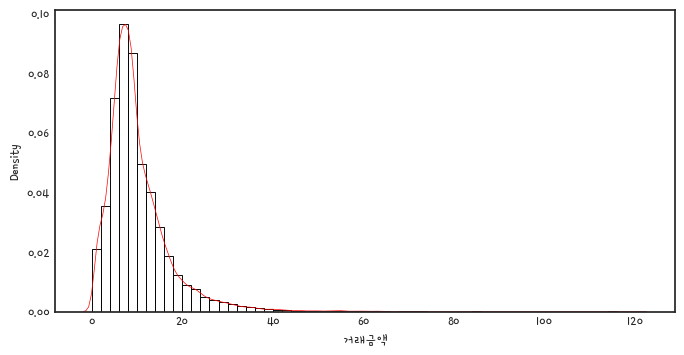

In [38]:
# 히스토그램의 y축을 빈도수 대신 밀도로 변경합니다.
sns.histplot(data = apt, x = '거래금액', bins = bins, 
             color = '1', edgecolor = '0', 
             stat = 'density')

# 히스토그램에 커널 밀도 추정 곡선을 추가합니다.
sns.kdeplot(data = apt, x = '거래금액', color = 'red', 
            linewidth = 0.5, linestyle = '-');

### 관심 있는 자치구 선택

In [39]:
# apt에서 관심 있는 자치구를 선택하고 sub에 할당합니다.
sub = apt[apt['자치구'].str.contains(pat = '강[남동북]')].copy()

In [40]:
# 자치구별 거래금액 평균(분포의 중심)을 확인합니다.
sub.groupby(by = ['자치구']).mean()['거래금액']

자치구
강남구    18.855207
강동구     9.390740
강북구     6.839834
Name: 거래금액, dtype: float64

In [41]:
# 거래금액 최솟값과 최댓값을 확인합니다.
sub['거래금액'].describe()[['min', 'max']]

min      0.78
max    115.00
Name: 거래금액, dtype: float64

In [42]:
# 히스토그램의 계급을 다시 생성합니다.
bins = np.arange(start = 0, stop = 116, step = 1)

### 히스토그램을 겹쳐서 그리기

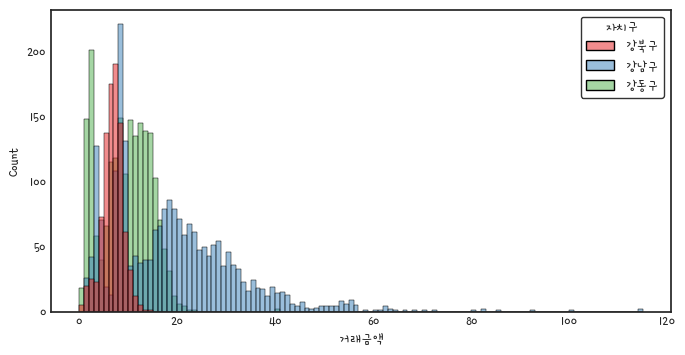

In [43]:
# 자치구별 히스토그램을 겹쳐서 그립니다.
sns.histplot(data = sub, x = '거래금액', bins = bins, 
             hue = '자치구', palette = 'Set1');

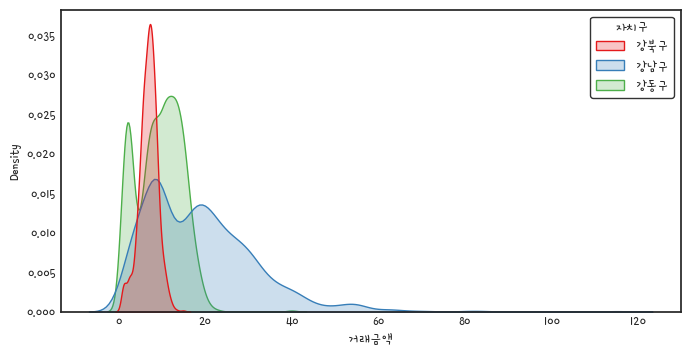

In [44]:
# 커널 밀도 추정 곡선을 겹쳐서 그리는 것이 더 낫습니다.
sns.kdeplot(data = sub, x = '거래금액', shade = True,
            hue = '자치구', palette = 'Set1');

### 히스토그램을 나눠서 그리기

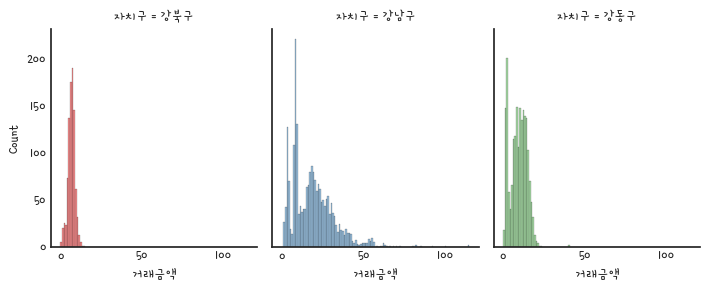

In [45]:
# 자치구별 히스토그램을 열(가로) 방향으로 나눠서 그립니다.
sns.displot(data = sub, x = '거래금액', bins = bins, 
            hue = '자치구', palette = 'Set1', 
            col = '자치구', legend = False, 
            height = 3, aspect = 0.8);

### 일변량 상자 수염 그림 그리기

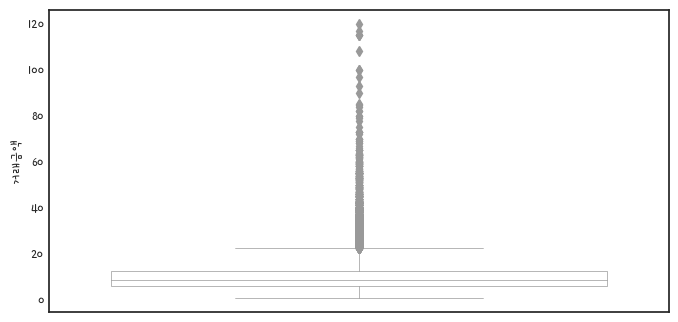

In [46]:
# 거래금액으로 상자 수염 그림을 그립니다.
sns.boxplot(data = apt, y = '거래금액', color = '1', linewidth = 0.5);

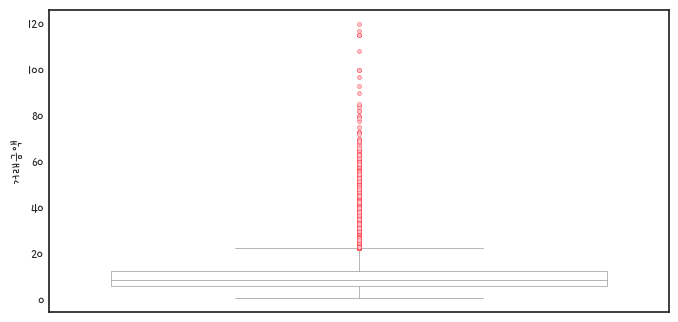

In [47]:
# 이상치 관련 속성을 딕셔너리로 생성하고 상자 수염 그림에 추가합니다.
outlier = {'marker': 'o', 
           'markersize': 3, 
           'markerfacecolor': 'pink',
           'markeredgecolor': 'red', 
           'markeredgewidth': 0.2}

sns.boxplot(data = apt, y = '거래금액', color = '1', linewidth = 0.5, 
            flierprops = outlier);

### 이변량 상자 수염 그림 그리기

In [48]:
# apt의 자치구별 거래금액 중위수를 오름차순 정렬한 grp를 생성합니다.
grp = apt.groupby(by = ['자치구']).median()['거래금액']
grp = grp.sort_values()
grp.head()

자치구
도봉구    5.85
금천구    5.95
노원구    6.30
중랑구    6.40
구로구    6.70
Name: 거래금액, dtype: float64

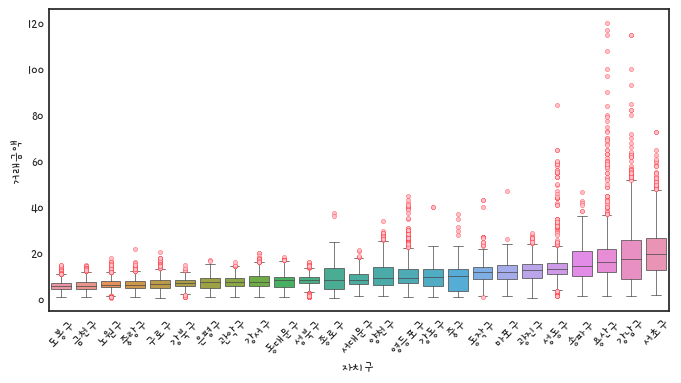

In [49]:
# x축에 자치구, y축에 거래금액을 지정하고 이변량 상자 수염 그림을 그립니다.
sns.boxplot(data = apt, x = '자치구', y = '거래금액', linewidth = 0.5, 
            flierprops = outlier, order = grp.index)
plt.xticks(rotation = 45);

### 일변량 막대그래프 그리기

In [50]:
# apt의 자치구별 거래금액 빈도수를 내림차순 정렬한 grp를 생성합니다.
grp = apt.groupby(by = ['자치구']).count()['거래금액']
grp = grp.sort_values(ascending = False)
grp.head()

자치구
노원구    3680
강서구    2814
성북구    2265
강남구    2240
구로구    2226
Name: 거래금액, dtype: int64

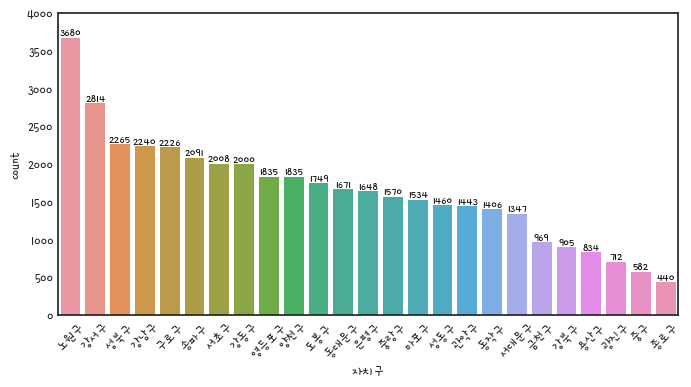

In [51]:
# 자치구별 빈도수로 일변량 막대그래프를 그립니다.
sns.countplot(data = apt, x = '자치구', order = grp.index)
plt.ylim(0, 4000)
plt.xticks(rotation = 45)

# 막대 위에 자치구별 빈도수를 텍스트로 추가합니다.
for i, v in enumerate(grp):
    plt.text(x = i, y = v, s = v, ha = 'center', va = 'bottom', 
             color = 'black', fontsize = 9, fontweight = 'bold')

### [참고] 파이 차트 그리기

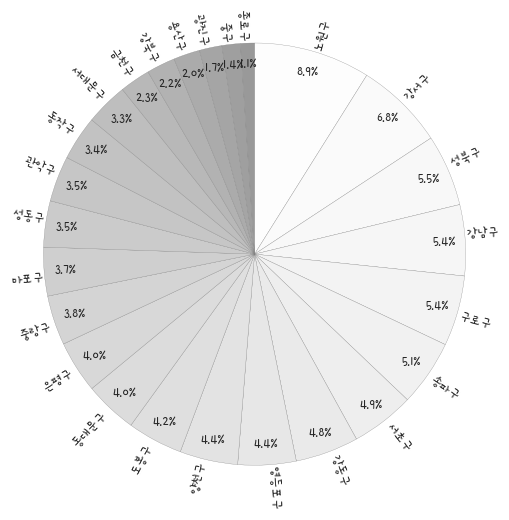

In [52]:
# 자치구별 빈도수로 파이차트를 그립니다.
plt.figure(figsize = (6, 6), dpi = 100)
pal = sns.color_palette(palette = 'Greys', n_colors = 50)
plt.pie(x = grp.values, labels = grp.index, colors = pal, 
        autopct = '%.1f%%', pctdistance = 0.9, labeldistance = 1,
        startangle = 90, counterclock = False, rotatelabels = True, 
        wedgeprops = dict(edgecolor = '0.5', linewidth = 0.2))
plt.axis('equal');

### 이변량 막대그래프 그리기

In [53]:
# apt의 자치구별 거래금액 평균을 내림차순 정렬한 grp를 생성합니다.
grp = apt.groupby(by = ['자치구']).mean()['거래금액']
grp = grp.sort_values(ascending = False).round(1)
grp.head()

자치구
서초구    19.9
용산구    19.8
강남구    18.9
송파구    15.6
성동구    14.4
Name: 거래금액, dtype: float64

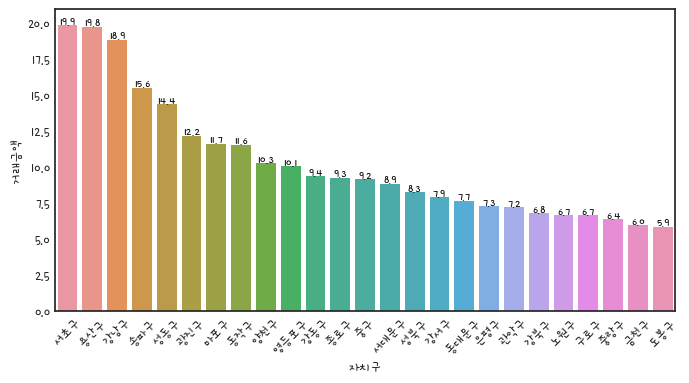

In [54]:
# 자치구별 거래금액 평균으로 이변량 막대그래프를 그립니다.
sns.barplot(data = apt, x = '자치구', y = '거래금액', order = grp.index, 
            estimator = np.mean, ci = None)
plt.ylim(0, 21)
plt.xticks(rotation = 45)

# 막대 위에 거래금액 평균을 텍스트로 추가합니다.
for i, v in enumerate(grp):
    plt.text(x = i, y = v, s = v, ha = 'center', va = 'bottom',
             color = 'black', fontsize = 9, fontweight = 'bold')

### [참고] 묶음 막대그래프 그리기

In [55]:
# sub의 자치구와 금액구분별 거래금액 평균으로 grp를 생성합니다.
grp = sub.groupby(by = ['자치구', '금액구분']).mean()['거래금액']
grp = grp.round(1)
grp.head()

자치구  금액구분 
강남구  5천 미만     8.4
     5천 이상    24.4
강동구  5천 미만     7.5
     5천 이상    11.6
강북구  5천 미만     6.8
Name: 거래금액, dtype: float64

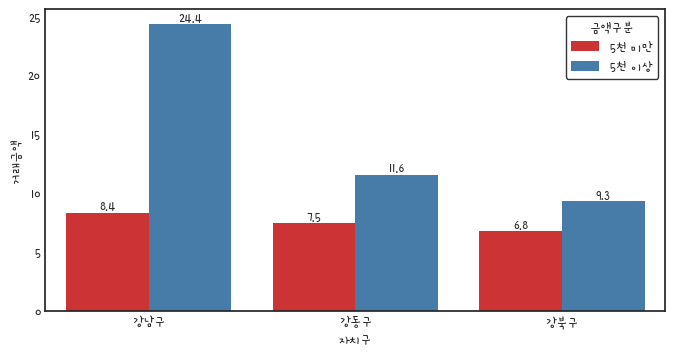

In [56]:
# 이변량 막대그래프의 x축에 범주형 변수를 추가한 묶음 막대그래프를 그립니다.
sns.barplot(data = sub, x = '자치구', y = '거래금액', hue = '금액구분', 
            order = grp.index.levels[0], hue_order = grp.index.levels[1],
            estimator = np.mean, ci = None)

# 묶음 막대 위에 거래금액 평균을 텍스트로 추가합니다.
for i, v in enumerate(grp):
    if i % 2 == 0:
        i = i/2 - 0.2
    else:
        i = (i-1)/2 + 0.2
    plt.text(x = i, y = v, s = v, ha = 'center', va = 'bottom')

### 선그래프 그리기

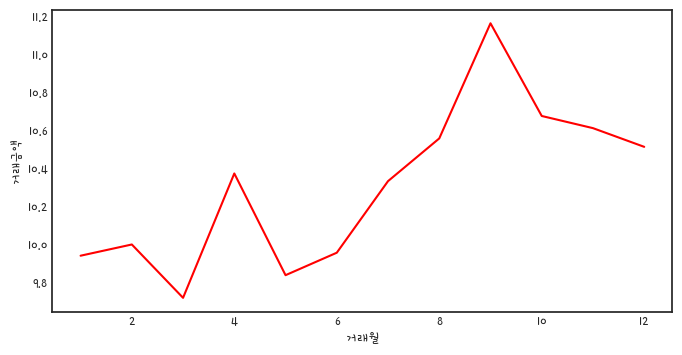

In [57]:
# 거래월별 거래금액 평균으로 선그래프를 그립니다.
sns.lineplot(data = apt, x = '거래월', y = '거래금액', color = 'red', 
             estimator = np.mean, ci = None);

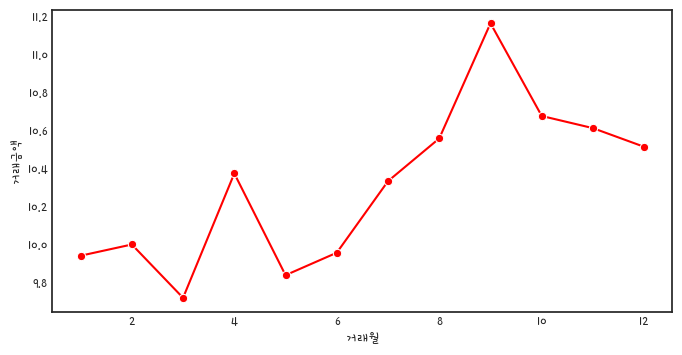

In [58]:
# 선그래프에 점을 추가합니다.
sns.lineplot(data = apt, x = '거래월', y = '거래금액', color = 'red', 
             markers = True, style = 1, legend = False, 
             estimator = np.mean, ci = None);

### x축 눈금명 추가

In [59]:
# 선그래프에 추가할 x축 눈금명을 생성합니다.
months = [f'{str(i)}월' for i in range(1, 13)]
months

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

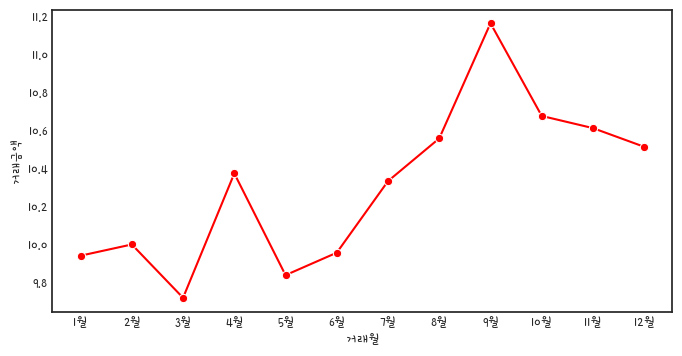

In [60]:
# 선그래프에 x축 눈금명을 추가합니다.
sns.lineplot(data = apt, x = '거래월', y = '거래금액', color = 'red', 
             markers = True, style = 1, legend = False, 
             estimator = np.mean, ci = None)
plt.xticks(ticks = range(1, 13), labels = months);

### 선그래프를 겹쳐서 그리기

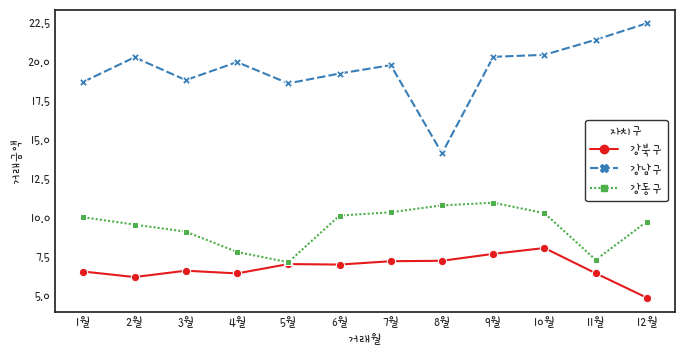

In [61]:
# 자치구별 선그래프를 겹쳐서 그립니다.
sns.lineplot(data = sub, x = '거래월', y = '거래금액', hue = '자치구', 
             markers = True, style = '자치구', 
             estimator = np.mean, ci = None)
plt.xticks(ticks = range(1, 13), labels = months);

### 산점도 그리기

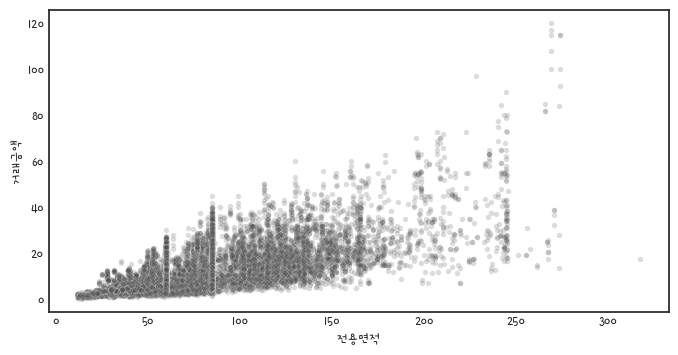

In [62]:
# 전용면적과 거래금액으로 산점도를 그립니다.
sns.scatterplot(data = apt, x = '전용면적', y = '거래금액', 
                color = '0.3', s = 15, 
                lw = 0.5, alpha = 0.2);

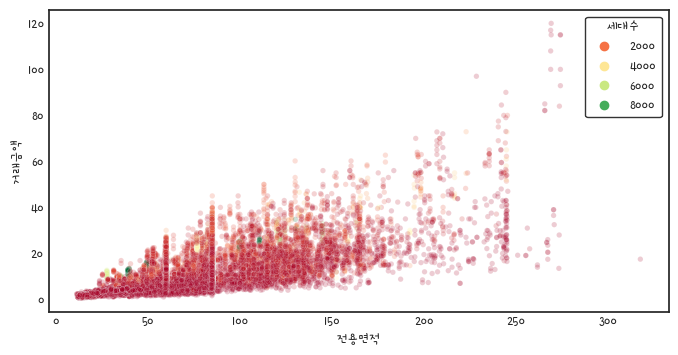

In [63]:
# 세대수(연속형 변수)에 따라 채우기 색을 다르게 설정합니다.
sns.scatterplot(data = apt, x = '전용면적', y = '거래금액', 
                hue = '세대수', palette = 'RdYlGn', s = 15, 
                lw = 0.5, alpha = 0.2);

### 강남구 데이터로 산점도 그리기

In [64]:
# apt에서 강남구만 선택하고 gng에 할당합니다.
gng = apt[apt['자치구'].eq('강남구')].copy()

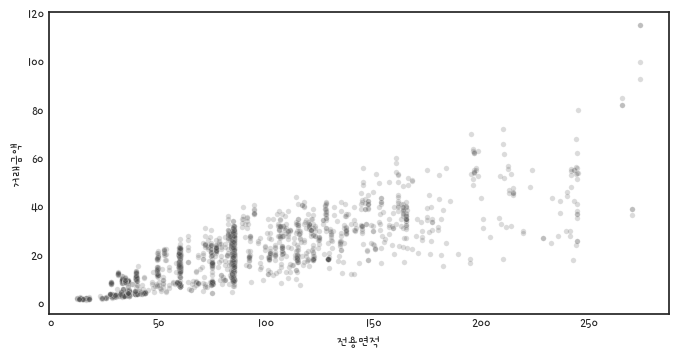

In [65]:
# gng로 산점도를 그립니다.
sns.scatterplot(data = gng, x = '전용면적', y = '거래금액', 
                color = '0.3', s = 15, 
                lw = 0.5, alpha = 0.2);

### 산점도에 회귀직선, 수직선 및 수평선 추가

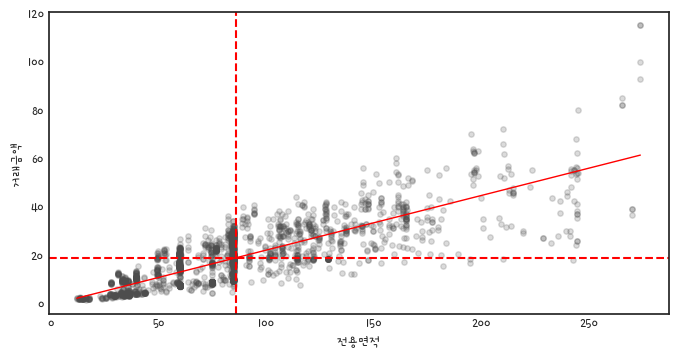

In [66]:
# 산점도에 회귀직선, 수직선(x 평균) 및 수평선(y 평균)을 추가합니다.
sns.regplot(data = gng, x = '전용면적', y = '거래금액', 
            scatter_kws = dict(color = '0.3', s = 15, alpha = 0.2),  
            line_kws = dict(color = 'red', lw = 1), 
            ci = None)
plt.axvline(x = gng['전용면적'].mean(), color = 'red', ls = '--')
plt.axhline(y = gng['거래금액'].mean(), color = 'red', ls = '--');

### 산점도 행렬 그리기

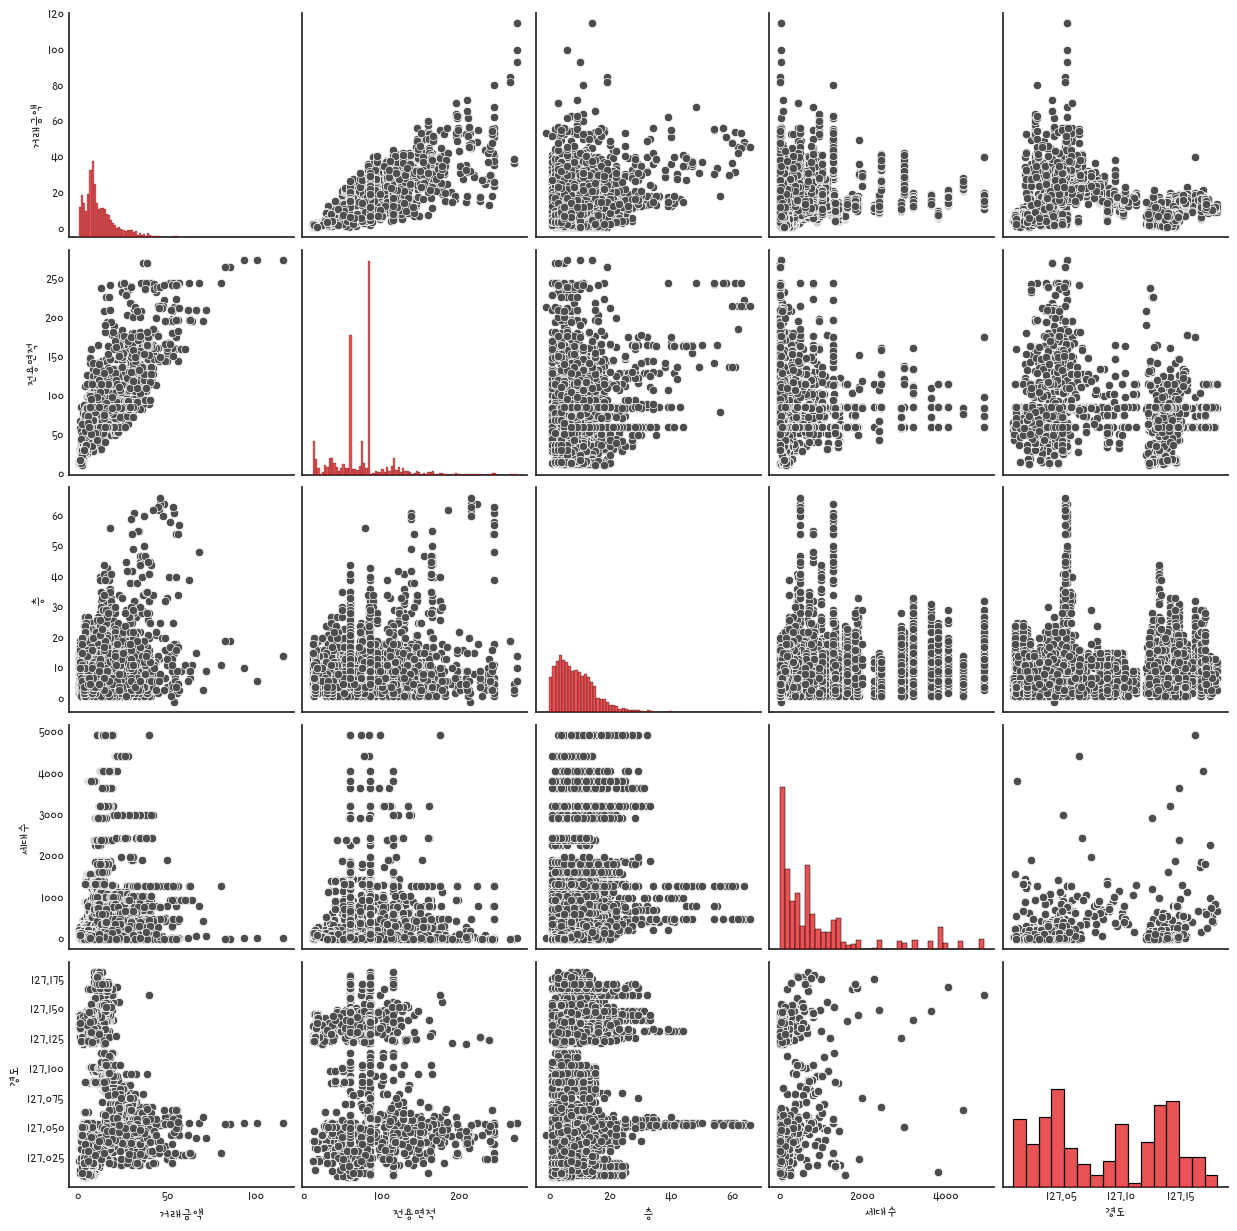

In [67]:
# 산점도 행렬에 추가할 변수명으로 리스트를 생성하고 산점도 행렬을 그립니다.
cols = ['거래금액', '전용면적', '층', '세대수', '경도']
sns.pairplot(data = sub[cols], plot_kws = dict(color = '0.3'));

### 산점도 행렬을 간결하게 그리기

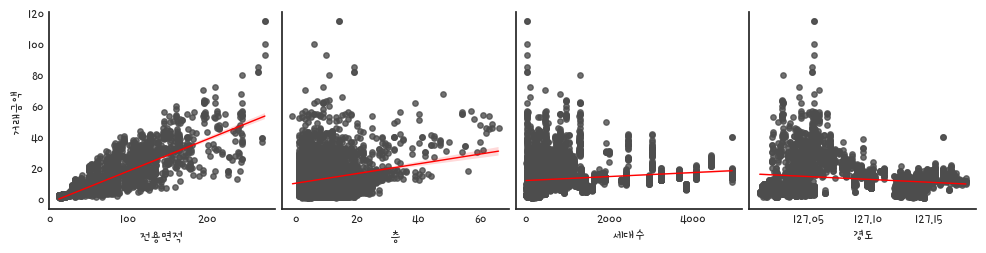

In [68]:
# x축에 입력변수, y축에 목표변수를 산점도 행렬을 간결하게 그립니다.
sns.pairplot(data = sub, 
             x_vars = ['전용면적', '층', '세대수', '경도'], 
             y_vars = '거래금액', 
             kind = 'reg', 
             plot_kws = dict(scatter_kws = dict(color = '0.3', s = 15),
                             line_kws = dict(color = 'red', lw = 1)));

## End of Document